In [59]:
# Import

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

%matplotlib inline

# Functions

def write_image(filename,stringa):
    '''
    writes the image to file
    '''
    textfile = open(filename,'w')
    textfile.write(stringa)
    textfile.close()
    

def create_dGrid(x, y):
    '''returns a dictionary with the tuple (i in x, j in y) and values ['#','',['','']] '''
    
    dictionary = {}
    
    for i in range(x):
        for j in range(y):
            
            dictionary[(i,j)] = ['#','',['','']]
    
    return dictionary

def getSizeGrid(dGrid):
    '''returns the max size of dGrid'''

    return max(dGrid.keys())

def print_dGrid(dGrid):
    
    sOut = ''
    maxCoord = getSizeGrid(dGrid)
        
    for i in range(maxCoord[0]+1):
        for j in range(maxCoord[1]+1):
        
            #print(i,j)
            sOut += dGrid[(i,j)][0]
        
        sOut += '\n'
    
    return sOut[:-1]

    
def distance(a,b):
    '''euclidean 2d distance'''
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )


def generate_circle(x,y, velMax, kappaMax, vAmpMax, vAgeMax, vLifeTime=vAgeMax):
    '''generates circle with parameter [(center), speed, kappa, amplitude,startTime, age, lifetime] '''
    
    #sizeGrid = getSizeGrid(dGrid)
    
        # circle [(center), speed, kappa, amplitude,startTime, age, lifetime]
    return [(x[np.random.randint(len(x))],y[np.random.randint(len(y))])\
                             ,velMax*np.random.rand()\
                             ,kappaMax*np.random.rand()\
                            ,vAmpMax*np.random.rand()\
                            ,np.random.randint(vAgeMax/2), vLifeTime]
        
        
def generate_dCircles(x,y, velMax, kappaMax, vAmpMax, vAgeMax, numberCircles, vLifeTime=None):
    '''generate dictionary of circles'''
    
    dCircles = {}
    
    for i in range(numberCircles):
        
        dCircles[i+1] = generate_circle(x,y, velMax,kappaMax,  vAmpMax, vAgeMax, vLifeTime)
    
    return dCircles
    

def amplitude(time,tMax, position, center, velocity, vAmplitude, vKappa):
    '''computes fading wave function for given circle'''
    if time < 0:
        return 0
    
    elif time - tMax >= 0:
        
        dist = distance(position,center)
        
        if dist-(time-tMax)*velocity <= 0:
            return 0
        
        else:
            return (vAmplitude/dist)*np.cos(vKappa*dist-time*velocity)
            return 0
    
    else:
        
        dist = distance(position,center)
        #return (amplitude/dist)*np.cos(dist - velocity*time)
        #return vAmplitude*(np.exp(-100*(dist-time*velocity)**2))
        
        if dist-time*velocity > 0:
            return 0
        
        elif dist == 0:
            return vAmplitude
        else:
            return (vAmplitude/dist)*np.cos(vKappa*dist-time*velocity)



{1: [(0.38795986622073553, -1.3511705685618729), 1.4406369850784926, 0.11038713010169748, 0.7512255033884068, 19, None], 2: [(3.8929765886287626, 2.0200668896321066), 2.7882626243385884, 0.15685176299658263, 1.3485122766011042, 29, None], 3: [(-3.0635451505016724, -0.81605351170568552), 0.5394408580889963, 0.19124433622076442, 1.0699175971266106, 26, None], 4: [(-1.0836120401337794, 3.1170568561872907), 2.444696090801424, 0.19487940384504263, 0.21533825331118028, 13, None], 5: [(-1.511705685618729, -3.9464882943143813), 1.3148314418510212, 0.10090030486694526, 1.4320252221471115, 16, None], 6: [(1.7257525083612038, -0.41471571906354532), 0.19544485178198656, 0.0210094630055232, 0.7219758723187943, 13, None], 7: [(-2.9565217391304346, 3.5451505016722411), 0.7193535392993263, 0.0849175214519687, 1.0317802694837077, 17, None], 8: [(-0.12040133779264206, 1.4314381270903009), 0.004820245286123681, 0.018993671956445968, 1.947075377202017, 23, None]}
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1

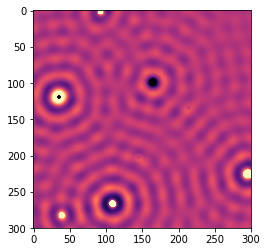

In [71]:
# Definitions

tMax = 60
circleProb = 10 
sizeGrid = (300,300)
velMax = 3
vAmpMax = 2
vAgeMax = tMax
kappaMax = .2

seed = 123339981

# center speed amplitude age
#dCircleTest = {1 : [(1,1),.2,vAmp,0], 2 : [(-1,-1),.4,.5,4], 3 : [(0,-2),.6,2,10], 4 : [(.5,3),.6,2,10] }
#dCircleTest = {1 : [(1,1),1,.2,0], 2 : [(-1,-1),1,.3,4] , 3 : [(0,-2),.6,.5,10], 4 : [(.5,3),.6,.5,20]}

dGrid = {}

x = np.linspace(-4, 4, sizeGrid[0])
y = np.linspace(-4, 4, sizeGrid[1])

dCircleTest = generate_dCircles(x,y,velMax,kappaMax, vAmpMax, vAgeMax, 8)

print(dCircleTest)

#1*(np.exp(-(dist-1*0)**2))

for t in range(tMax):
    
    print(t)
    
    for i in range(sizeGrid[0]):
        for j in range(sizeGrid[1]):
            
            dGrid[(x[i],y[j])] = 0
            
            for k in dCircleTest:
                
                circleCenter = dCircleTest[k][0]
                circleSpeed = dCircleTest[k][1]
                circleKappa = dCircleTest[k][2]
                circleAmplitude = dCircleTest[k][3]
                circleAge = dCircleTest[k][4]
                
                if dCircleTest[k][5] == None:
                    circleLifeTime = tMax
                else:
                    circleLifeTime = dCircleTest[k][5] 
                
                dGrid[(x[i],y[j])] += amplitude(t-circleAge, circleLifeTime, (x[i],y[j]),\
                                                circleCenter, circleSpeed, \
                                                circleKappa, circleAmplitude )
        #print(amplitude(0,(0,1), (1,1), 1, 1))
        
    z = np.array([dGrid[(i,j)] for j in y for i in x])
    Z = z.reshape(sizeGrid[0], sizeGrid[1])
    aa = plt.imshow(Z, interpolation='bilinear', vmin=-vAmpMax, vmax=vAmpMax,cmap=cm.magma)
    #plt.colorbar(aa)
    #plt.show()
    
    plt.savefig('./testvid/img'+str(t)+'.png')


